# 定义问题

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

预测房价
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# 获取数据

Kaggle:https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# 数据预处理

## 导入环境库

In [1]:
#load packages， 打印，便于可复现
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



Python version: 2.7.13 |Anaconda custom (x86_64)| (default, Dec 20 2016, 23:05:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version: 0.23.3
matplotlib version: 2.0.0
NumPy version: 1.12.1
SciPy version: 1.1.0
IPython version: 5.1.0
scikit-learn version: 0.19.1
-------------------------


## 导入数据模型与可视化库

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## 载入总览数据

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

'''
预测SalePrice的值
'''

train_df.columns 
# train_df.shape
# train_df.describe()
# train_df.info()
# print '%' * 40
# test_df.info()
# train_df.head(10)
# train_df.info()
# print train_df.describe(include = 'all')
# print '%' * 40
# test_df.info()

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

## 4C分析

数据的：

正确性：Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs.异常值

完整性：NULL / NAN。删除/补全

创造性：Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome. For this dataset, we will create a title feature to determine if it played a role in survival.

转变：类别数据 -> 独热编码

### 完整性 (缺失值)

https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456

I：允许的missing values的数目，先定25%

In [4]:
# # Missing Data的百分比
# total = train_df.isnull().sum().sort_values(ascending=False)
# percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# # print missing_data.head(20)

# total2 = test_df.isnull().sum().sort_values(ascending=False)
# percent2 = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
# missing_data2 = pd.concat([total2, percent2], axis=1, keys=['Total', 'Percent'])
# # print missing_data2.head(20)

In [5]:
train_df.describe(include = 'all')
print '%' * 40

# print train_df.loc[:,'MasVnrType']

# train_df['MasVnrType'] = train_df['MasVnrType'].replace(['None'],None )
# train_df.loc[:,'MasVnrType'] =  train_df['MasVnrType'].apply(lambda x: None if x == 'None' else x)
# print type(train_df.loc[1,'MasVnrType'])

limit_missing_values = 0.25
train_limit_missing_values = len(train_df) * limit_missing_values 
print "Train columns with null values:\n", train_df.columns[train_df.isnull().sum().values > train_limit_missing_values]  # 依列为标准，column
print '%'*40

test_limit_missing_values = len(test_df) * limit_missing_values
print "Test columns with null values:\n", test_df.columns[test_df.isnull().sum().values > test_limit_missing_values]



%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Train columns with null values:
Index([u'Alley', u'FireplaceQu', u'PoolQC', u'Fence', u'MiscFeature'], dtype='object')
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Test columns with null values:
Index([u'Alley', u'FireplaceQu', u'PoolQC', u'Fence', u'MiscFeature'], dtype='object')


丢弃过多空数据的列

In [6]:
drop_columns = ['Alley', u'FireplaceQu', u'PoolQC', u'Fence', u'MiscFeature']
train_df = train_df.drop(drop_columns, axis=1)
test_df = test_df.drop(drop_columns, axis=1)

# train_df = train_df.drop(missing_data[missing_data['Total'] > 1].index, axis=1)
# train_df = train_df.drop(train_df.loc[train_df['Electrical'].isnull()].index)
train_df.isnull().sum().max()

# test_df = test_df.drop(missing_data[missing_data['Total'] > 1].index, axis=1)
test_df.isnull().sum().max()


227

In [7]:
train_df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'GarageType',
       u'GarageYrBlt', u'GarageFinish', u'GarageCars', u'GarageArea',
  

II:特征意义

特征意义：

0、ID 无意义，去掉

1、MSSubClass 住所风格

2、MSZoing 地带

3、LotFrontage 住宅到街道的步行距离

4、LotArea 地块面积

5、。。

III: 填充空数据

数值：中位数

类别：众数

In [8]:
missing_columns = list(train_df.columns[train_df.isnull().sum() != 0])
print (missing_columns)
# train_df[missing_columns].describe(include = 'all')
print '%' * 40
test_missing_columns = list(test_df.columns[test_df.isnull().sum() != 0])
print test_missing_columns

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType']


In [9]:
# combine = [train_df, test_df]
train_missing_columns_nums = ['LotFrontage', 'MasVnrArea','GarageYrBlt']
train_missing_columns_categories = ['MasVnrType', 'BsmtQual','BsmtCond', 
                              'BsmtExposure','BsmtFinType1','BsmtFinType2', 
                              'Electrical', 'GarageType', 'GarageFinish',
                              'GarageQual','GarageCond']

condition = test_df[test_missing_columns].describe(include='all').loc['mean'].isnull()

test_missing_columns_categories = test_df[test_missing_columns].describe(include='all').loc['mean'].loc[condition].index
test_missing_columns_nums = [x for x in test_missing_columns if x not in test_missing_columns_categories]

# for data in combine:
    
#     # 通过中位数填充 median()
#     for column in missing_columns_nums:
#         data[column].fillna(data[column].median(), inplace= True)

# 通过中位数填充
for column in train_missing_columns_nums:
    train_df[column].fillna(train_df[column].median(), inplace=True)

for column in test_missing_columns_nums:
    test_df[column].fillna(test_df[column].median(), inplace=True)
    
    
# 通过最大类填充，众数
for category in train_missing_columns_categories:
#         print data[category].value_counts().index[0]
#     print category, train_df[category].mode()[0]
    train_df[category].fillna(train_df[category].mode()[0], inplace=True)
    
for category in test_missing_columns_categories:
    test_df[category].fillna(test_df[category].mode()[0], inplace=True)

In [10]:
print train_df.isnull().sum().max()
print test_df.isnull().sum().max()
# print test_df.loc[test_df.isnull()

0
0


### 创造性

移除ID

In [11]:
train_df = train_df.drop(['Id'], axis=1)
test_df = test_df.drop(['Id'], axis=1)

In [14]:
print train_df.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'LotShape', u'LandContour', u'Utilities', u'LotConfig', u'LandSlope',
       u'Neighborhood', u'Condition1', u'Condition2', u'BldgType',
       u'HouseStyle', u'OverallQual', u'OverallCond', u'YearBuilt',
       u'YearRemodAdd', u'RoofStyle', u'RoofMatl', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'MasVnrArea', u'ExterQual',
       u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2', u'BsmtFinSF2',
       u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC', u'CentralAir',
       u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea',
       u'BsmtFullBath', u'BsmtHalfBath', u'FullBath', u'HalfBath',
       u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd',
       u'Functional', u'Fireplaces', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageCars', u'GarageArea', u'GarageQ

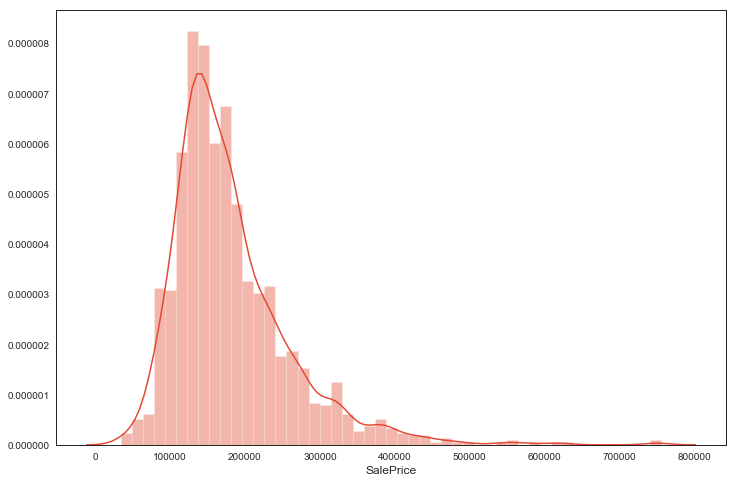

In [19]:
train_df['SalePrice'].describe()
sns.distplot(train_df['SalePrice'])

### 转化性（类别数据）

In [12]:
features_train = train_df.drop(['SalePrice'], axis=1)
labels_train = train_df['SalePrice']
features_train = pd.get_dummies(features_train)
features_test = pd.get_dummies(test_df)

missing_cols = set(features_train.columns) - set(features_test.columns)
for column in missing_cols:
    features_test[column] = 0
    
# 保证测试集columns的顺序同训练集columns相同，特别重要！！！！！！
features_test = features_test[features_train.columns]

In [13]:
print len(features_train.columns), len(features_test.columns)

270 270


PCA降维


In [14]:
# # 数据标准化，避免量纲的影响，注意测试训练集一起做
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# scaler = StandardScaler()
# features_train = scaler.fit_transform(features_train)
# features_test = scaler.fit_transform(features_test)


In [15]:
# pca = PCA(n_components=10)
# features_train = pca.fit_transform(features_train)
# features_test = pca.fit_transform(features_test)

# # 根据array新建一个DataFrame (二维数组， 列名)
# features_train = pd.DataFrame(features_train, columns = ['Dimension' + str(i) for i in range(1,11)])
# features_test = pd.DataFrame(features_test, columns = ['Dimension' + str(i) for i in range(1,11)])


In [16]:
# print features_train.head(10)

### 分割训练和测试数据

In [17]:
from sklearn.model_selection import train_test_split

# 分割features_train 和 labels_train, 测试集大小 = 20%，状态：随机，可复现
# 顺序：测试特征，训练特征，测试目标，训练目标

X_train, X_test, y_train, y_test = train_test_split(features_train, labels_train, test_size = 0.2, random_state = 42)

# 输出数量观察

print len(X_train), len(X_test)

1168 292


# 探索性数据分析 EDA

In [18]:
X_train.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,0,0,0,1,0,0,0,0,1,0


# 模型

## 分析问题，确定模型

问题为回归问题，可用模型：线性回归，决策树（C&RT决策树），随机森林，GBDT

## 首先用简单的模型进行试验，观察评分

回归模型评分指标包括：

1、SSE误差平方和

2、R-square（决定系数）

3、矫正决定系数

In [19]:
# 导入算法模型和评分标准 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import fbeta_score, make_scorer, r2_score
from xgboost import XGBRegressor

# 初始化,确定随机状态，可复现
reg1 = DecisionTreeRegressor(random_state = 42)
reg2 = LinearRegression()
reg3 = RandomForestRegressor(random_state = 42)
reg4 = XGBRegressor()


# 建立字典，收集学习器的效果
# 学习，收集预测得分
results = {}
for reg in [reg1, reg2, reg3, reg4]:
    # 回归器的名称
    reg_name = reg.__class__.__name__
    reg.fit(X_train, y_train)
    pred_test = reg.predict(X_test)
    results[reg_name] = r2_score(y_test, pred_test)
    
print results

{'RandomForestRegressor': 0.86928566224852166, 'LinearRegression': 0.88609146718355769, 'XGBRegressor': 0.88112479353734507, 'DecisionTreeRegressor': 0.76010442399851175}


## 网格搜索调参

### 随机森林

In [20]:
# # 模型：RandomForest
# # 导入Grid
# from sklearn.model_selection import GridSearchCV

# # 初始化回归模型
# reg = RandomForestRegressor(random_state=42)

# # 确定参数列表
# parameters = {'min_samples_split':range(2,6), 'max_depth':range(10, 101, 10)}

# # 确定评分标准
# scorer = make_scorer(r2_score)

# # 回归模型使用网格搜索
# grid_reg = GridSearchCV(reg, parameters, scoring = scorer)

# # 训练
# grid_reg.fit(X_train, y_train)

# # 获得最佳拟合回归器
# best_reg = grid_reg.best_estimator_

### 线性回归

In [21]:
# # 模型：线性回归
# from sklearn.model_selection import GridSearchCV

# # 初始化回归模型
# reg = LinearRegression()

# # 确定参数列表
# parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

# # 确定评分标准
# scorer = make_scorer(r2_score)

# # 回归模型使用网格搜索
# grid_reg = GridSearchCV(reg, parameters, scoring = scorer)

# # 训练
# grid_reg.fit(X_train, y_train)

# # 获得最佳拟合回归器
# best_reg = grid_reg.best_estimator_

### Xgboost

In [22]:
# 模型：Xgboost
from sklearn.model_selection import GridSearchCV

# 初始化模型
reg = XGBRegressor()

# 设定参数
# parameters = {
    
# }

# # 评分标准
# scorer = make_scorer(r2_score)

# # 网格搜索
# grid_reg = GridSearchCV(reg, parameters, scoring=scorer)

# 训练
reg.fit(X_train, y_train)

# 获取最佳拟合器
best_reg = reg

## 确定在测试集上的分数

In [23]:
pred_y_test = best_reg.predict(X_test)
r2_score(pred_y_test, y_test)

0.84742163250575953

# 预测目标数据

In [24]:
pred = best_reg.predict(features_test)
pred

array([ 122587.9140625,  155048.046875 ,  171248.515625 , ...,
        168261.25     ,  126874.5859375,  233776.953125 ], dtype=float32)

# 输出结果

In [25]:
# 增加索引，列名，构建DataFrame，符合输出数据格式

test_df = pd.read_csv('test.csv')
predict_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': pred})

# DataFrame设定index
predict_df = predict_df.set_index('Id')

# 重命名DataFrame的列，列名 = 字典{原：替换后}
# predict_df.rename(columns = {predict_df.columns[0]: 'Id'}, inplace=True)

predict_df

,SalePrice
Id,
1461,122587.914062
1462,155048.046875
1463,171248.515625
1464,188974.484375
1465,200921.437500
1466,176009.375000
1467,173523.546875
1468,167716.531250
1469,178873.265625


In [26]:
predict_df.to_csv('Submission.csv')

# 待优化策略

I：PCA得分： 0.21683  RF

II：去掉PCA得分：0.18129，3227位  RF

III：Xgboost : 0.14339


待优化点有：

1、评分标准更改为Kaggle标准

2、特征分析，创造新特征

特征较多：74，如何选取以及探索恰当的特征？

3、探索性分析，确定关键特征

4、Xgboost学习，调参  ✅

5、集成方法


待解决问题有：

1、为什么使用PCA降维后效果不好？

2、怎么判断模型存在过拟合？✅

学习曲线，Learning curve

3、线性回归为什么有负值 ✅

在做类别数据 -> 数值转化时，训练集同测试集列名存在区别。只新增了测试集缺失的列，未调整列的顺序。
注意：test = test[train.columns]




In [27]:
df = pd.DataFrame(np.random.randint(1,10, size=(3,4)), columns = ['A', 'B', 'C', 'D'])

In [28]:
df2 = pd.DataFrame(np.random.randint(1,10, size=(2,3)), columns = ['A', 'C', 'D'])

In [29]:
df2

,A,C,D
0,3,3,6
1,5,9,2


In [30]:
df

,A,B,C,D
0,1,5,8,8
1,7,5,3,6
2,4,8,1,7


In [31]:
missing_cols = set(df.columns) - set(df2.columns)
for column in missing_cols:
    df2[column] = 0

In [32]:
df2

,A,C,D,B
0,3,3,6,0
1,5,9,2,0


In [33]:
df2 = df2[df.columns]

In [34]:
df2

,A,B,C,D
0,3,0,3,6
1,5,0,9,2
